In [6]:
import matplotlib.pylab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from opt_einsum import contract,contract_path
from tqdm.auto import tqdm
import dacite
import torch
from scipy.optimize import curve_fit
from functools import partial,wraps,reduce
import pickle
def _toN(t):
    return t.detach().cpu().tolist()
def _toT(t):
    return torch.as_tensor(t)

torch.set_default_tensor_type(torch.cuda.DoubleTensor)
device=torch.device('cuda:0')
torch.cuda.set_device(device)

In [2]:
import importlib
import HOTRGZ2,TNModels,GILT,utils,ScalingDimensions,fix_gauge
importlib.reload(fix_gauge)
importlib.reload(HOTRGZ2)
importlib.reload(TNModels)
importlib.reload(ScalingDimensions)
importlib.reload(GILT)
importlib.reload(utils)
from HOTRGZ2 import forward_observable_tensor,forward_observable_tensors,trace_tensor,trace_two_tensors,get_lattice_size,get_dist_torus_2D
from HOTRGZ2 import HOTRG_layers,GILT_options,MCF_options
from TNModels import Ising2D,AKLT2D,AKLT2DStrange
from ScalingDimensions import show_effective_rank,show_diff,show_scaling_dimensions,show_asymmetry

In [3]:
filenames=[
    './data/hotrg_X24_tensors.pkl',
    './data/hotrg_X30_tensors.pkl',
    './data/hotrg_X44_tensors.pkl',
    './data/hotrg_gilt_X24_tensors.pkl',
    './data/hotrg_gilt_X30_tensors.pkl',
    './data/hotrg_gilt_X44_tensors.pkl',
]

In [4]:

params=Ising2D.get_default_params()
model=Ising2D(params)
T0=model.get_T0()
T0_op1,T0_op2,checkerboard=model.get_SZT0(),model.get_SZT0(),False

reference_scaling_dimensions=[0.125,1,1.125,2,2.125,3,3.125,4]
reference_center_charge=.5

./data/hotrg_X24_tensors.pkl


  0%|          | 0/61 [00:00<?, ?it/s]

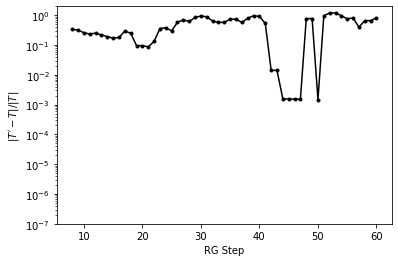

  0%|          | 0/61 [00:00<?, ?it/s]

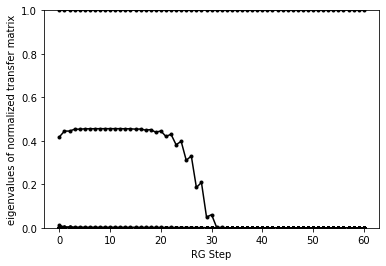

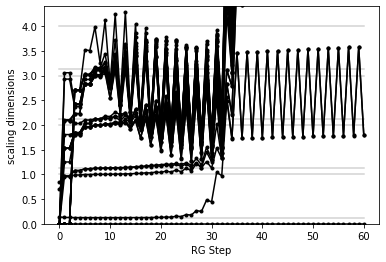

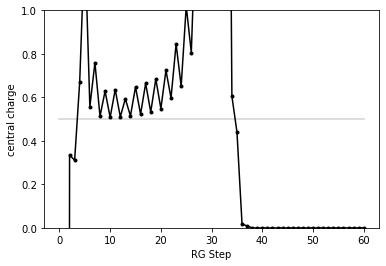

./data/hotrg_X30_tensors.pkl


  0%|          | 0/61 [00:00<?, ?it/s]

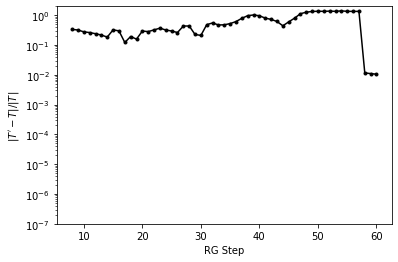

  0%|          | 0/61 [00:00<?, ?it/s]

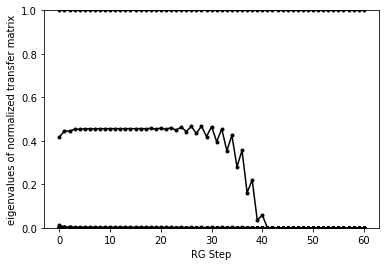

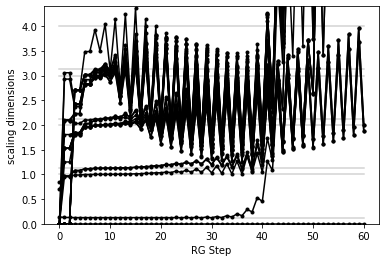

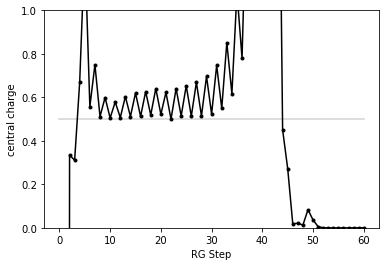

./data/hotrg_X44_tensors.pkl


  0%|          | 0/61 [00:00<?, ?it/s]

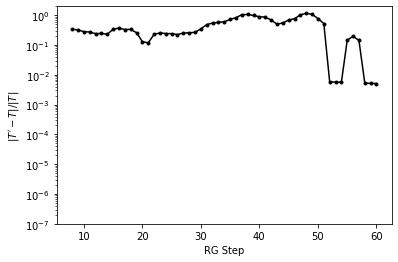

  0%|          | 0/61 [00:00<?, ?it/s]

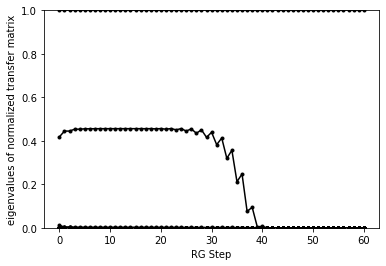

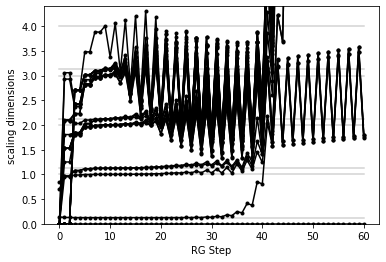

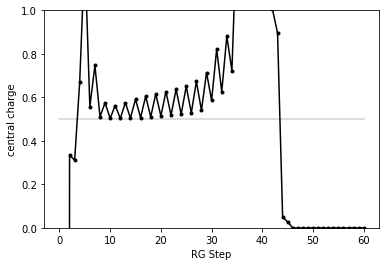

./data/hotrg_gilt_X24_tensors.pkl


  0%|          | 0/61 [00:00<?, ?it/s]

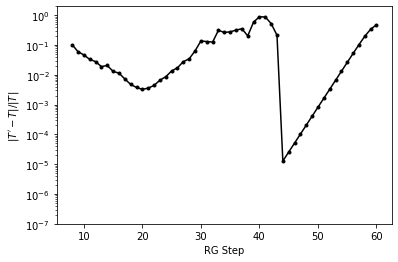

  0%|          | 0/61 [00:00<?, ?it/s]

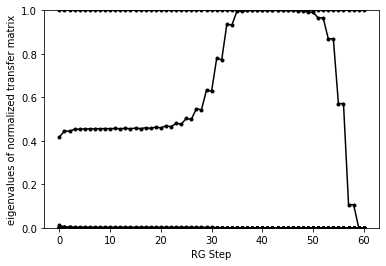

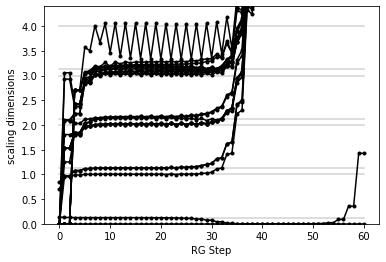

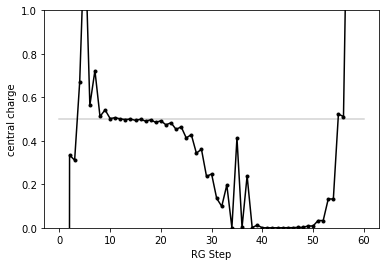

./data/hotrg_gilt_X30_tensors.pkl


  0%|          | 0/61 [00:00<?, ?it/s]

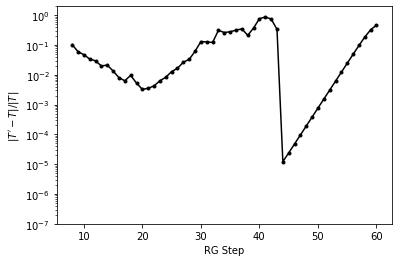

  0%|          | 0/61 [00:00<?, ?it/s]

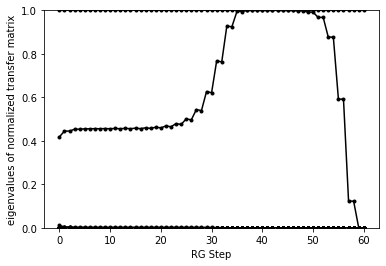

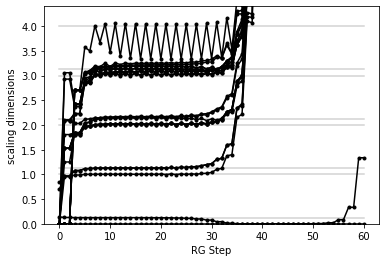

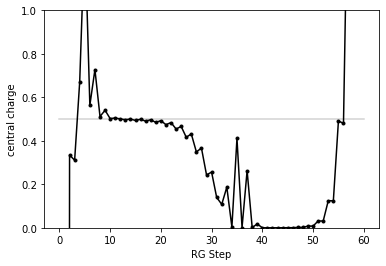

./data/hotrg_gilt_X44_tensors.pkl


  0%|          | 0/61 [00:00<?, ?it/s]

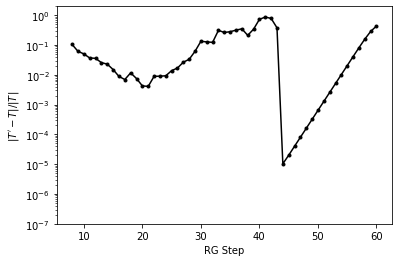

  0%|          | 0/61 [00:00<?, ?it/s]

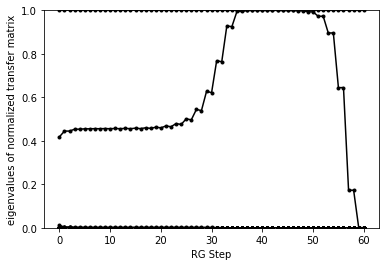

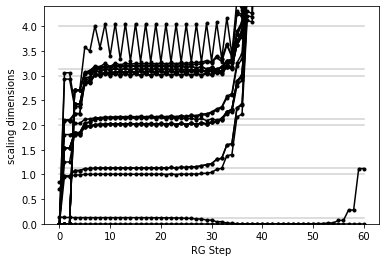

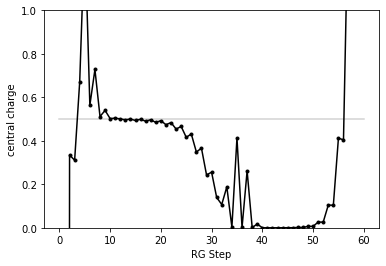

In [17]:
for filename in filenames:
    print(filename)
    layers,Ts,logTotals=torch.load(filename,map_location=device)
    #show_effective_rank(Ts)
    show_diff(Ts,stride=2)
    curve=show_scaling_dimensions(Ts,loop_length=2,num_scaling_dims=24,is_HOTRG=True,reference_scaling_dimensions=reference_scaling_dimensions,reference_center_charge=reference_center_charge)
